In [1]:
using Revise
includet("src/MTH8404_projet.jl")

# Étude sur un algo

In [2]:
using .problems, 
    .all_at_once,
    .model
    
traj_target = generate_problem("A")
stats = all_at_once_ipopt(traj_target)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    35980
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    11000

Total number of variables............................:    16000
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

"Execution stats: first-order stationary"

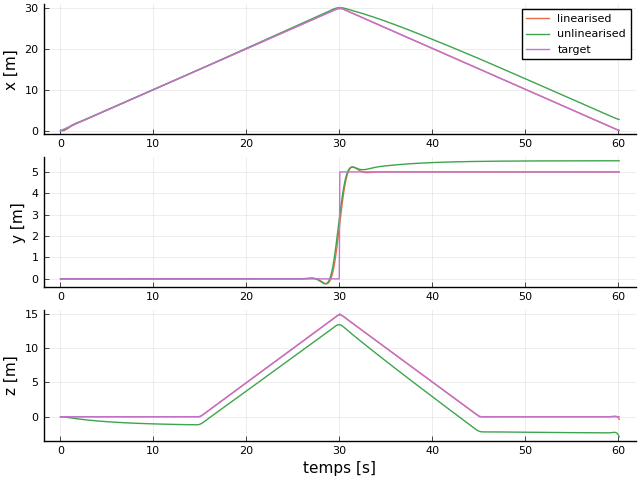

In [3]:
pyplot()
using .post_processing
traj_opt, traj_sim = sol_2_trajectory(stats, traj_target)

trajectories = Dict([("target", traj_target), ("linearised", traj_opt), ("unlinearised", traj_sim)])
plt_pos = plot_trajectory(trajectories)

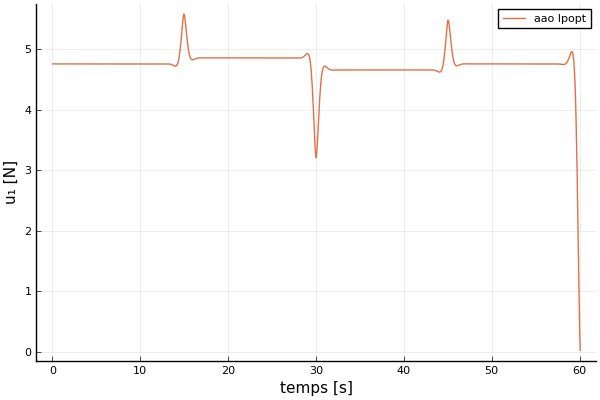

In [4]:
plt_u1 = plot_u1(Dict([("aao Ipopt",stats)]))

linearised -> 7.268633347478618
unlinearised -> 74.95225997852502
target -> 0.0


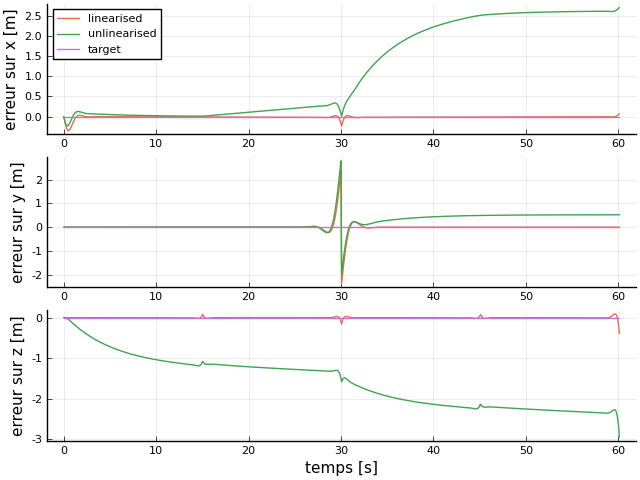

In [5]:
plt_error, dict_error = solve_L2_error(trajectories, traj_target)
for (name, L2) in dict_error
    println(name, " -> ", L2)
end
plt_error

# Étude comparative de plusieurs algo

In [6]:
traj_target = generate_problem("B")
stats_ipopt = all_at_once_ipopt(traj_target)
stats_ripqp = all_at_once_RipQP(traj_target)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    35944
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    10989

Total number of variables............................:    15984
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:    15984
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

"Execution stats: solved to within acceptable tolerances"

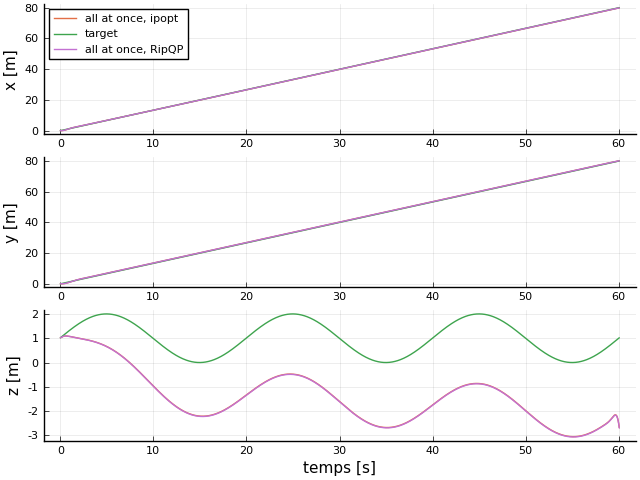

In [7]:
trajectories = Dict([("target", traj_target)])

_, trajectories["all at once, ipopt"] = sol_2_trajectory(stats_ipopt, traj_target)
_, trajectories["all at once, RipQP"] = sol_2_trajectory(stats_ripqp, traj_target)

plt_pos = plot_trajectory(trajectories)

# Étude avec perturbations

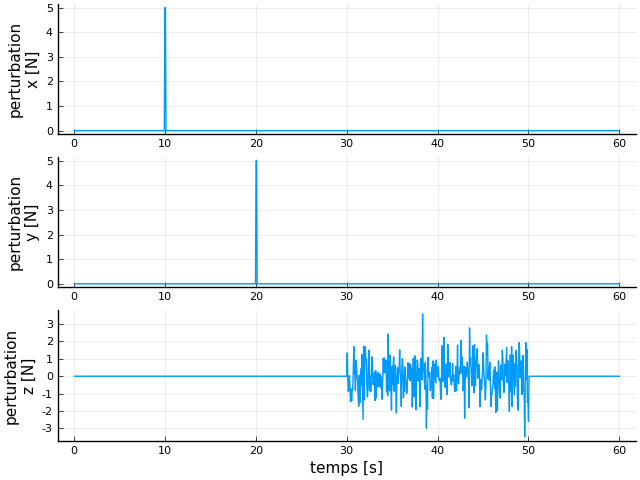

In [8]:
perturb = generate_disturbance(traj_target.n) # perturbation décrite dans l'article de référence
plt = plot_disturbance(perturb, traj_target.dt)

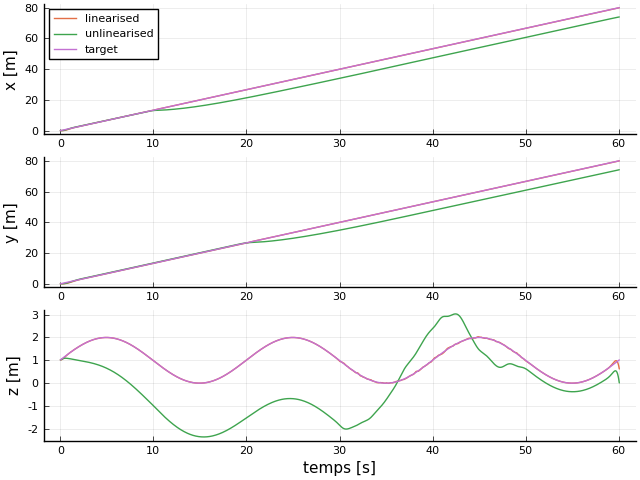

In [9]:
traj_target = generate_problem("B",disturbed=true)
trajectories = Dict([("target", traj_target)])
stats_ripqp_perturb = all_at_once_RipQP(traj_target)
trajectories["linearised"], trajectories["unlinearised"] = sol_2_trajectory(stats_ripqp_perturb, traj_target)
plt_pos = plot_trajectory(trajectories)